**Importing all necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

**Importing dataset**

In [2]:
df = pd.read_csv(r'C:\Users\Mahi\Downloads\car_purchasing.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
df.drop(columns=['customer name','customer e-mail','country','gender'],inplace=True)
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [7]:
df.corr()

,age,annual Salary,credit card debt,net worth,car purchase amount
age,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,0.632865,0.617862,0.028882,0.488580,1.000000


In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
y=y.values.reshape(-1,1)

**Data Scaling**

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler= MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

In [12]:
y

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [13]:
len(x)

500

**data Splitting**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, shuffle=True,random_state=42)

In [16]:
x_train.shape

(450, 4)

In [17]:
y_test.shape

(50, 1)

**Machine Learning Model**

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [20]:
lr_model.score(x_train,y_train)

0.9999999811362869

In [21]:
lr_pred=lr_model.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
print(mean_squared_error(y_test,lr_pred))

3.992213453561496e-10


In [24]:
print(r2_score(y_test,lr_pred))

0.9999999803460698


In [25]:
from sklearn.linear_model import Lasso

In [26]:
lasso=Lasso(alpha=0.0001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [27]:
lasso.score(x_train,y_train)

0.9999500261061571

In [28]:
lasso_pred= lasso.predict(x_test)
print(mean_squared_error(y_test,lasso_pred))

1.132859620280542e-06


In [29]:
print(r2_score(y_test,lasso_pred))

0.9999442285736122


In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge=Ridge(alpha=0.001)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001)

In [32]:
ridge.score(x_train,y_train)

0.9999999732587215

In [33]:
ridge_pred=ridge.predict(x_test)

In [34]:
print(mean_squared_error(y_test,ridge_pred))

5.201541860459188e-10


In [35]:
print(r2_score(y_test,ridge_pred))

0.9999999743924664


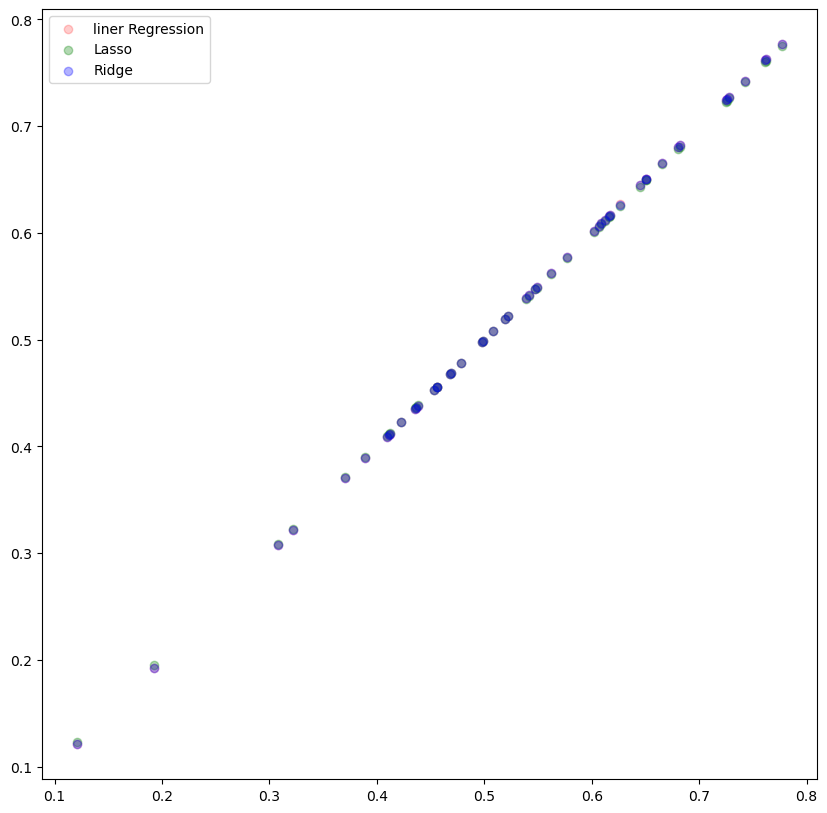

In [36]:
plt.figure(figsize=(10,10))

plt.scatter(y_test,lr_pred,c='r',alpha=0.2,label='liner Regression')
plt.scatter(y_test,lasso_pred, c='g',alpha=0.3,label='Lasso')
plt.scatter(y_test,ridge_pred,c='b',alpha=0.3, label='Ridge')

plt.legend()
plt.show()